In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import warnings

warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
train_data = pd.read_csv('/content/drive/MyDrive/titanic.zip (Unzipped Files)/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/titanic.zip (Unzipped Files)/test.csv')

In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
train_data['Age'].fillna(train_data['Age'].mode(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

In [15]:
test_data['Age'].fillna(test_data['Age'].mode(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mode(), inplace=True)
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)

In [16]:
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)

In [17]:
kmeans_features = ['Age', 'Fare', 'Pclass', 'SibSp']
kmeans_data = train_data[kmeans_features]
kmeans_data = (kmeans_data - kmeans_data.mean()) / kmeans_data.std()
kmeans_data_clean = kmeans_data.dropna()
kmeans = KMeans(n_clusters=3, random_state=40)

In [18]:
cluster_labels = kmeans.fit_predict(kmeans_data_clean)
train_data['Cluster'] = np.nan
train_data.loc[kmeans_data_clean.index, 'Cluster'] = cluster_labels

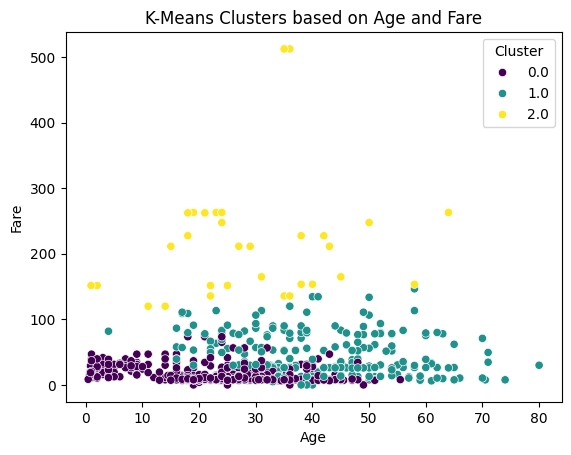

In [19]:
sns.scatterplot(x=train_data['Age'], y=train_data['Fare'], hue=train_data['Cluster'], palette='viridis')
plt.title('K-Means Clusters based on Age and Fare')
plt.show()

In [20]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']
X = train_data[features]
y = train_data['Survived']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

In [22]:
model = LogisticRegression()
model.fit(X_train_imputed, y_train)

LogisticRegression()

In [23]:
X_test_imputed = imputer.transform(X_test)
y_pred = model.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.81


In [24]:
X_final_test = test_data[features]
X_final_test_imputed = imputer.transform(X_final_test)

In [25]:
test_data['Survived'] = model.predict(X_final_test_imputed)

In [26]:
submission = test_data[['PassengerId', 'Survived']]
submission.to_csv('Titanicsubmission.csv', index=False)